<h1>EDA on sales data </h1>

We can help  to this firm in finding the answers to crucial issues by evaluating this sales data, including top-performing product lines, countries, territories, annual and monthly sales patterns, discount rates and sales relationships, and the number of active users each month.

<h3>Analysis Topics</h3>

1. Sales Distribution
2. Yearly and Monthly Revenues
3. Discount Rates and Sales Relation
4. Number of Sales for Countries and Territories
5. Sales Distribution for Deal Sizes
6. Monthly Active Users

ORDERNUMBER : Order number<br>
QUANTITYORDER : Quantity of products on the orderline<br>
PRICEEACH : Price for 1 product on the order line<br>
ORDERLLINENUMBER : Orderline number of order number<br>
SALES : Sale amount of order line<br>
ORDERDATE : Date of order<br>
STATUS : Status of order<br>
QTR_ID : Quarter of order (1: Quarter 1, 2: Quarter 2,etc.)<br>
MONTH_ID : Month of order (1: January, 2: February, 3: March, etc.)<br>
YEAR_ID : Year of order<br>
PRODUCTLINE : Product category<br>
MSRP : Manufacturer's suggested retail price<br>
PRODUCTCODE : Product number<br>
CUSTOMERNAME : Customer name<br>
PHONE : Customer's phone name<br>
ADDRESSLINE1 : Address information of customer 1<br>
ADDRESSLINE2 : Address information of customer 2<br>
CITY : City of address<br>
STATE : State of address<br>
POSTALCODE : Postalcode of address<br>
COUNTRY : Country of address<br>
TERRITORY : Region of address<br>
CONTACTLASTNAME : Contac person's last name for customer<br>
CONTACTFIRSTNAME : Contac person's first name for customer<br>
DEALSIZE : Size of the sale for order line<br>

<h1>Importing libraries</h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
sales = pd.read_csv('C:/Users/Tushar/sales_data_sample.xlsx',encoding='latin1')
sales.sort_values(by=['ORDERNUMBER'])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
578,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2024,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
680,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1267,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
728,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,10425,18,100.00,2,1895.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
393,10425,33,100.00,4,4692.60,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
160,10425,38,100.00,12,5894.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
780,10425,19,49.22,10,935.18,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small


In [82]:
sales.iloc[:,10:]

,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NAM,Yu,Kwai,Small
1,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NAM,Young,Julie,Medium
4,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NAM,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
sales.columns= sales.columns.str.lower()

In [4]:
sales.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [5]:
sales.describe()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,qtr_id,month_id,year_id,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
# Checking null values
sales.isnull().sum()

ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

In [7]:
# Determining Countries with null valued Territory
sales.loc[sales['territory'].isnull()]['country'].unique()

array(['USA', 'Canada'], dtype=object)

In [8]:
# Assigning North America Territory values
sales['territory'] = sales['territory'].fillna('NAM')
sales['territory'].unique()

array(['NAM', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [9]:
sales.loc[sales['state'].isnull()]['country'].unique()

array(['France', 'Norway', 'Finland', 'Austria', 'UK', 'Spain', 'Sweden',
       'Singapore', 'Italy', 'Denmark', 'Belgium', 'Philippines',
       'Germany', 'Switzerland', 'Ireland'], dtype=object)

In [10]:
sales['territory'].value_counts()

EMEA     1407
NAM      1074
APAC      221
Japan     121
Name: territory, dtype: int64

In [12]:
sales['state'].value_counts()

CA               416
MA               190
NY               178
NSW               92
Victoria          78
PA                75
CT                61
BC                48
NH                34
Tokyo             32
NV                29
Isle of Wight     26
Quebec            22
NJ                21
Osaka             20
Queensland        15
Name: state, dtype: int64

In [13]:
sales.loc[sales['state'].isnull()]['country'].unique()

array(['France', 'Norway', 'Finland', 'Austria', 'UK', 'Spain', 'Sweden',
       'Singapore', 'Italy', 'Denmark', 'Belgium', 'Philippines',
       'Germany', 'Switzerland', 'Ireland'], dtype=object)

In [11]:
sales['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [14]:
sales1 = sales[~((sales['status'] == 'Cancelled') | (sales['status'] == 'On Hold'))]
sales1['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Resolved'], dtype=object)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 18.,  67., 141., 209., 213., 242., 238., 212., 217., 177., 166.,
        136., 112.,  84.,  98.,  71.,  62.,  56.,  30.,  40.,  31.,  13.,
         17.,  24.,   8.,  10.,   6.,   6.,   3.,   1.,   2.,   1.,   2.,
          2.,   3.,   1.]),
 array([  482.13      ,   816.97361111,  1151.81722222,  1486.66083333,
         1821.50444444,  2156.34805556,  2491.19166667,  2826.03527778,
         3160.87888889,  3495.7225    ,  3830.56611111,  4165.40972222,
         4500.25333333,  4835.09694444,  5169.94055556,  5504.78416667,
         5839.62777778,  6174.47138889,  6509.315     ,  6844.15861111,
         7179.00222222,  7513.84583333,  7848.68944444,  8183.53305556,
         8518.37666667,  8853.22027778,  9188.06388889,  9522.9075    ,
         9857.75111111, 10192.59472222, 10527.43833333, 10862.28194444,
        11197.12555556, 11531.96916667, 11866.81277778, 12201.65638889,
        12536.5       ]),
 <a list of 36 Patch objects>)

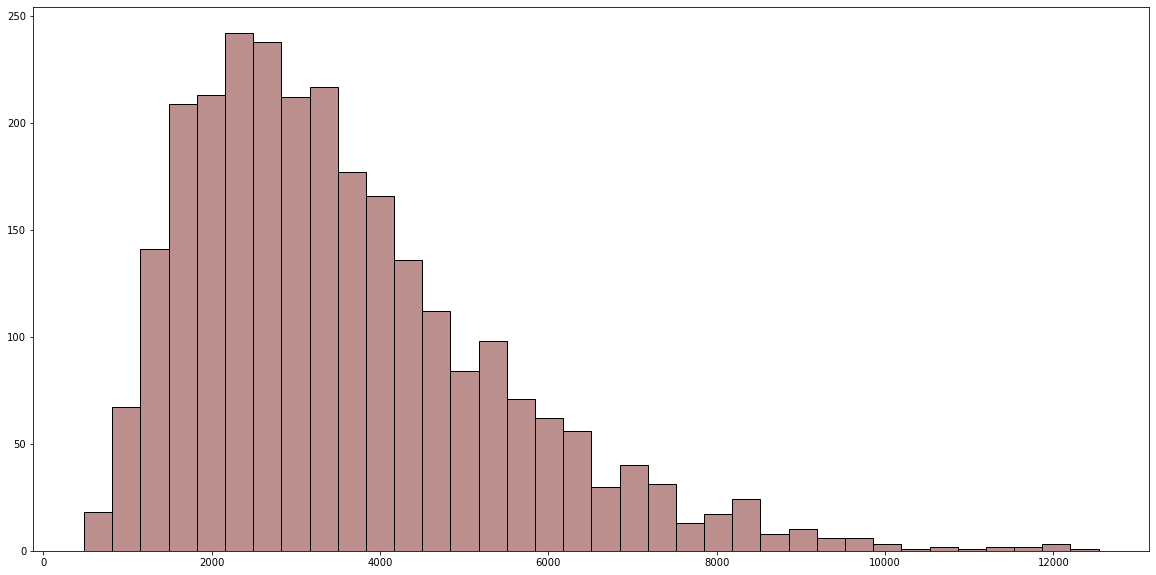

In [32]:
plt.figure(figsize=(20,10))
plt.hist(sales1['sales'],color = 'rosybrown',edgecolor = 'black', bins = int(180/5))

Sales distribution is right skewed. Most of the sales are between 2000-2500. Mean sale is around 3500.

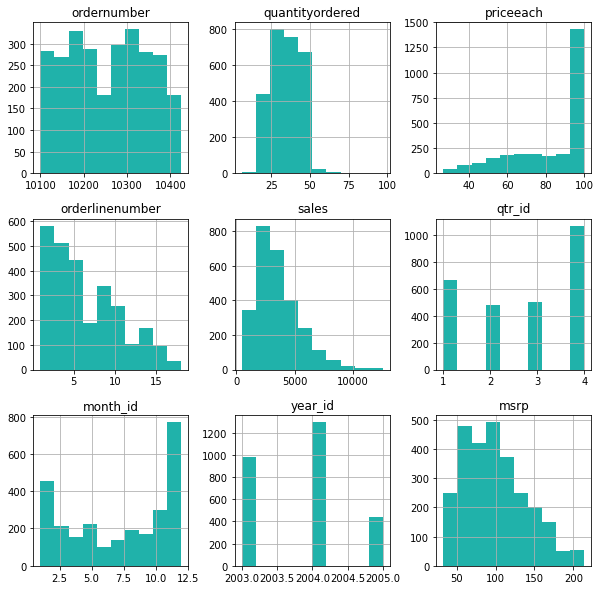

In [42]:
sales1.hist(figsize = (10,10),color='lightseagreen')
plt.show()

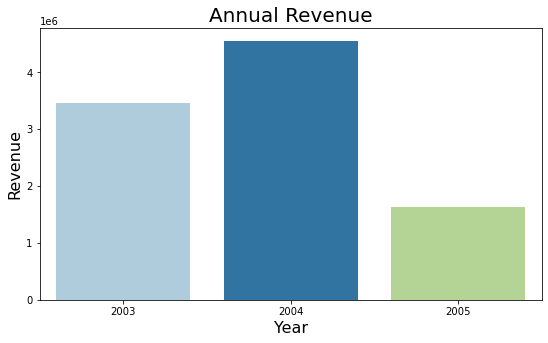

In [79]:
#sales revenue
plt.figure(figsize=(9,5))
yearly_revenue = sales1.groupby(['year_id'])['sales'].sum().reset_index()
sns.barplot(x="year_id", y="sales", data=yearly_revenue)
sns.color_palette('PuRd')
plt.title('Annual Revenue', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16)

plt.show()

Sales are increased from 2003 to 2004. Sales at 2005 is least but it doesn't contain whole year data.

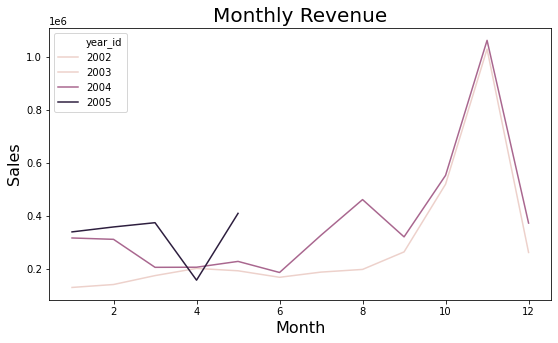

In [65]:
plt.figure(figsize=(9,5))

monthly_revenue = sales1.groupby(['year_id','month_id'])['sales'].sum().reset_index()

sns.lineplot(x="month_id", y="sales",hue="year_id", data=monthly_revenue)
plt.title('Monthly Revenue', fontsize = 20)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.show()

2005 sales for the first 5 months are higher than previous years except for April. The monthly sales trends at peaked on November.

In [87]:
sales1['discountrate'] = ((sales1['msrp']-sales1['priceeach'])/sales1['msrp'])*100
sales1[['priceeach','msrp','discountrate']]

D:\ketna\envs\tf_1.5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,priceeach,msrp,discountrate
0,95.70,95,-0.736842
1,81.35,95,14.368421
2,94.74,95,0.273684
3,83.26,95,12.357895
4,100.00,95,-5.263158
...,...,...,...
2817,97.16,54,-79.925926
2818,100.00,54,-85.185185
2819,100.00,54,-85.185185
2820,100.00,54,-85.185185


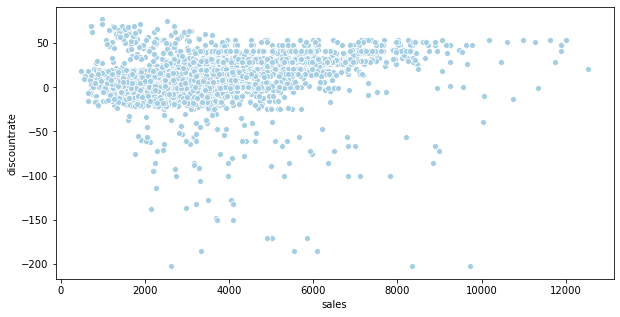

In [90]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sales, x=sales1["sales"], y=sales1["discountrate"],)


There is no relationship between discount rates and sales.

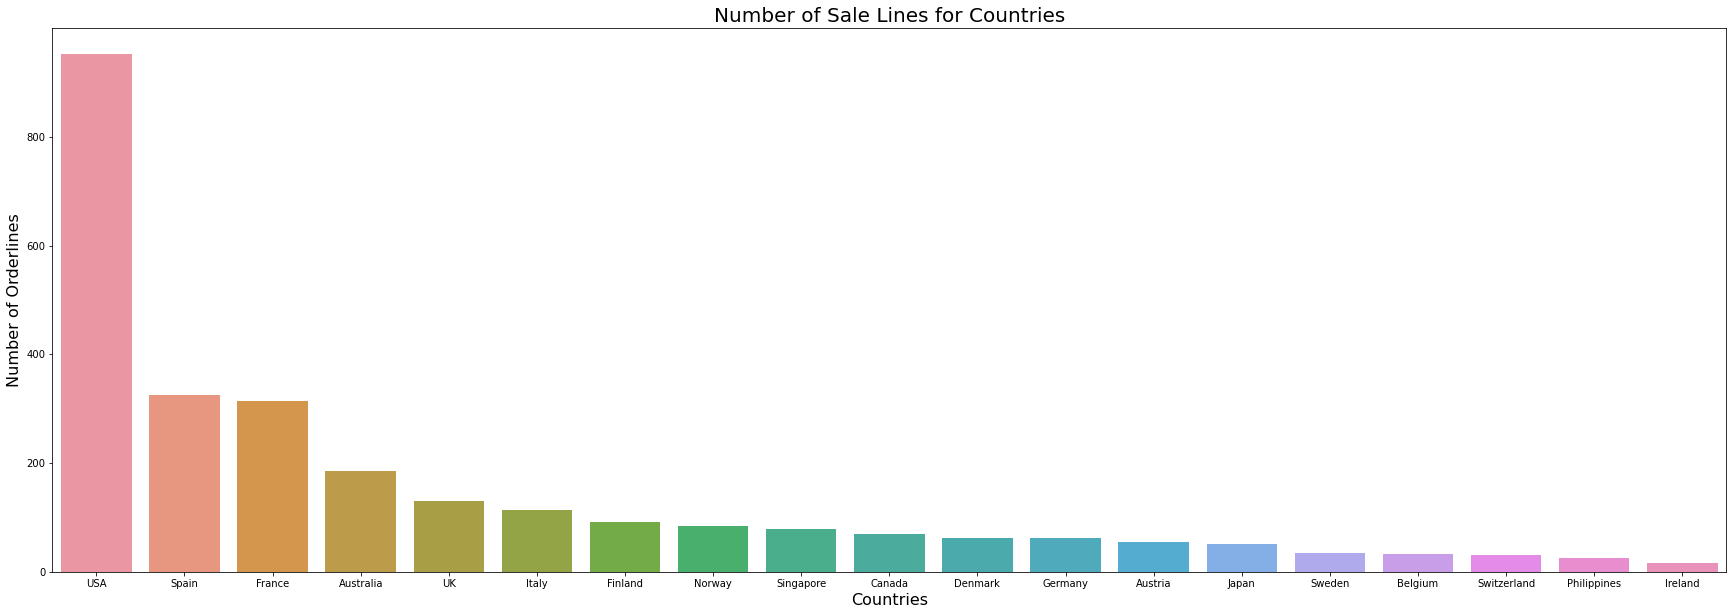

In [99]:
# Number of Sale Lines for Countries

plt.figure(figsize=(30,10))
sns.countplot(x = sales1['country'], order = sales1['country'].value_counts().index )
plt.title('Number of Sale Lines for Countries', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Countries', fontsize = 16)
plt.show()

The most of sales are happened at USA. Spain and France are the second and third most sold countries 

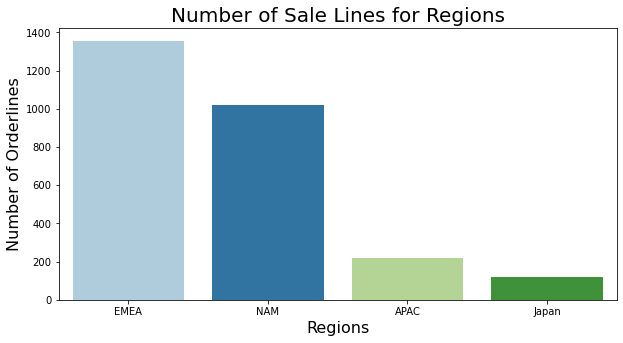

In [108]:
# Number of Sale Lines for Regions
plt.figure(figsize=(10,5))
sns.countplot(x = sales1['territory'], order = sales1['territory'].value_counts().index)
plt.title('Number of Sale Lines for Regions', fontsize = 20)
plt.ylabel('Number of Orderlines', fontsize = 16)
plt.xlabel('Regions', fontsize = 16)
plt.show()

The most of sales are happened at EMEA region. The NAM region which USA is in it is the second most sold region.

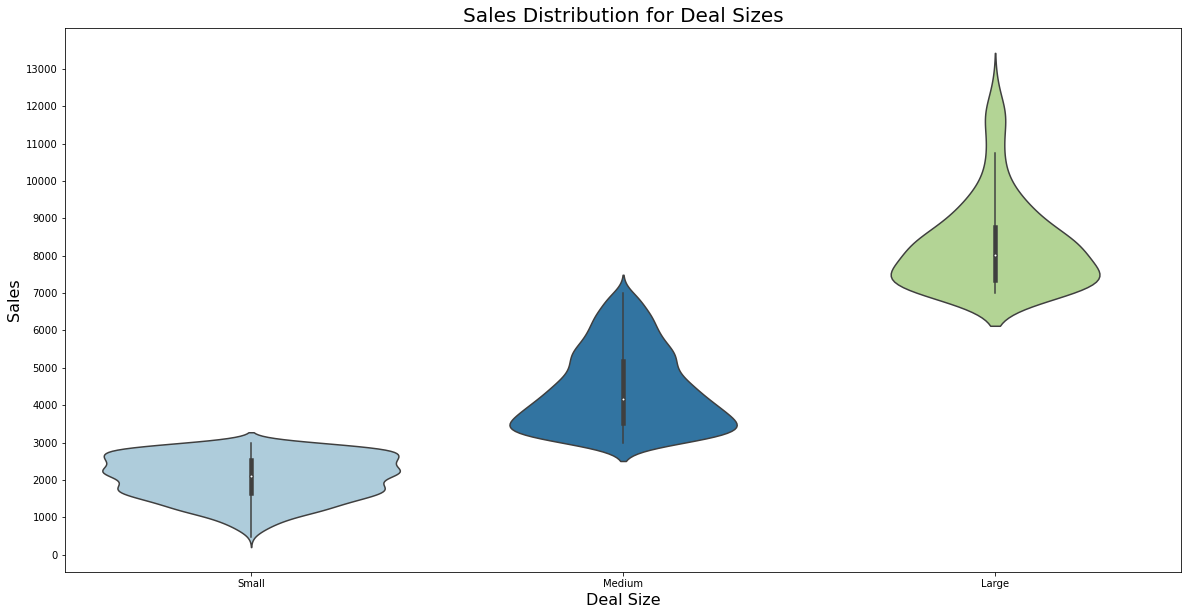

In [110]:
# Sales Distribution for Dealsizes
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,14000,1000))
sns.violinplot(x = sales1['dealsize'], y = sales1['sales'])
plt.title('Sales Distribution for Deal Sizes', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
plt.xlabel('Deal Size', fontsize = 16)
plt.show()

Small sales are sales between 0 and 3000. Medium sales are sales between 3000 and 7000. Large sales are the sales higher than 7000.

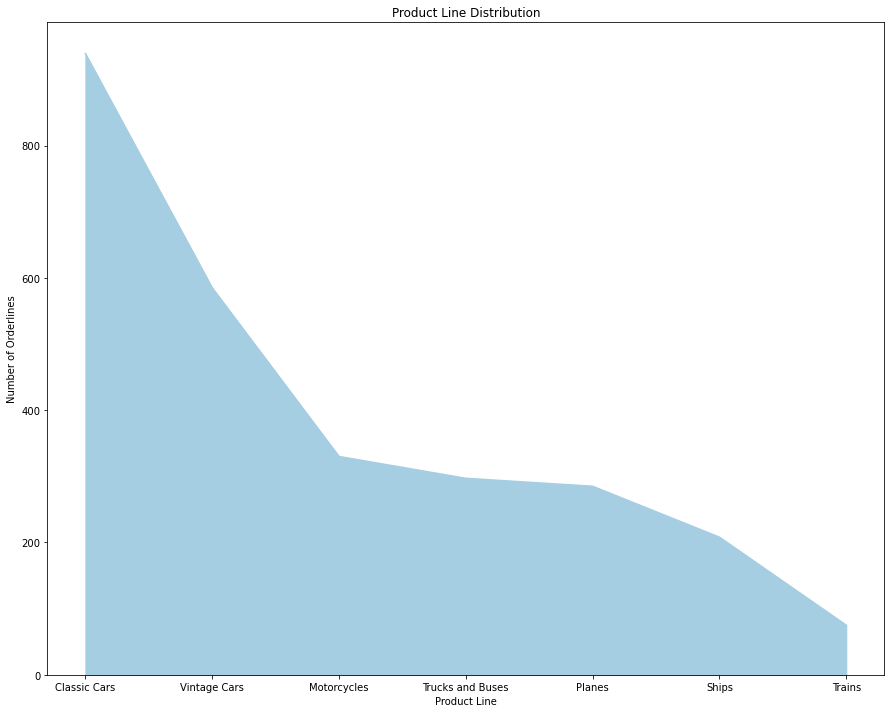

In [112]:
plt.figure(figsize=(15,12))
sales1['productline'].value_counts().plot(kind = 'area')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Number of Orderlines')
plt.show()

The most of the sales are belong Classic Cars category. Vintage Cars and Motorcycles are the second and third ones. The least of sales are happened in Trains category.

D:\ketna\envs\tf_1.5\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


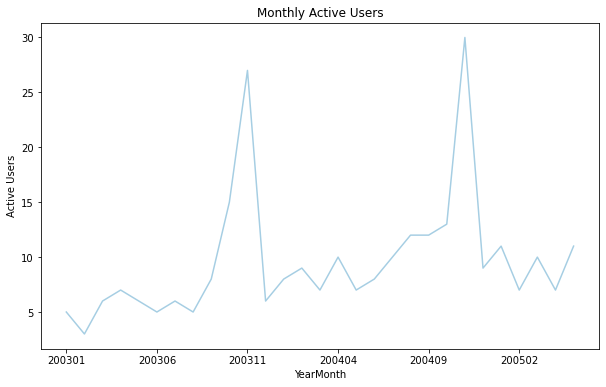

In [118]:
# Monthly Active Users
sales1['year_month'] = sales1['year_id'].map(str)+sales1['month_id'].map(str).map(lambda x: x.rjust(2,'0'))

plt.figure(figsize=(10,6))
sales1.groupby(['year_month'])['customername'].nunique().plot(kind='line')
plt.title('Monthly Active Users')
plt.xlabel('YearMonth')
plt.ylabel('Active Users')
plt.show()

